In [4]:
#0
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.optimize import minimize
import cvxpy as cp
import pytz
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.tsa.api as smt
from copy import deepcopy
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
import warnings
warnings.filterwarnings("ignore")
import statsmodels.tools.eval_measures
import scipy 
from scipy import stats 
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VARMAX
from sklearn.decomposition import PCA


# Data download

In [16]:
#1 #5
df = pd.read_csv("train.csv")
df

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0               0        0                  0      3180602.69   
1               1        0                  0       166603.91   
2               2        0                  0       302879.87   
3               3        0                  0     11917682.27   
4               4        0                  0       447549.96   
...           ...      ...                ...             ...   
5237975       195      480                540      2440722.89   
5237976       196      480                540       349510.47   
5237977       197      480                540            0.00   
5237978       198      480                540      1000898.84   
5237979       199      480                540      1884285.71   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                              1         0.999812   13380276.64        NaN   
1                             -1         0.999896    1642214.25        NaN   
2                             -1         0.999561    1819368.03        NaN   
3                             -1         1.000171   18389745.62        NaN   
4                             -1         0.999532   17860614.95        NaN   
...                          ...              ...           ...        ...   
5237975                       -1         1.000317   28280361.74   0.999734   
5237976                       -1         1.000643    9187699.11   1.000129   
5237977                        0         0.995789   12725436.10   0.995789   
5237978                        1         0.999210   94773271.05   0.999210   
5237979                       -1         1.002129   24073677.32   1.000859   

         near_price  bid_price   bid_size  ask_price   ask_size       wap  \
0               NaN   0.999812   60651.50   1.000026    8493.03  1.000000   
1               NaN   0.999896    3233.04   1.000660   20605.09  1.000000   
2               NaN   0.999403   37956.00   1.000298   18995.00  1.000000   
3               NaN   0.999999    2324.90   1.000214  479032.40  1.000000   
4               NaN   0.999394   16485.54   1.000016     434.10  1.000000   
...             ...        ...        ...        ...        ...       ...   
5237975    0.999734   1.000317   32257.04   1.000434  319862.40  1.000328   
5237976    1.000386   1.000643  205108.40   1.000900   93393.07  1.000819   
5237977    0.995789   0.995789   16790.66   0.995883  180038.32  0.995797   
5237978    0.999210   0.998970  125631.72   0.999210  669893.00  0.999008   
5237979    1.001494   1.002129  250081.44   1.002447  300167.56  1.002274   

           target  time_id       row_id  
0       -3.029704        0        0_0_0  
1       -5.519986        0        0_0_1  
2       -8.389950        0        0_0_2  
3       -4.010200        0        0_0_3  
4       -7.349849        0        0_0_4  
...           ...      ...          ...  
5237975  2.310276    26454  480_540_195  
5237976 -8.220077    26454  480_540_196  
5237977  1.169443    26454  480_540_197  
5237978 -1.540184    26454  480_540_198  
5237979 -6.530285    26454  480_540_199  

[5237980 rows x 17 columns]

In [17]:
#2 #6
df["sign_imb"] = df["imbalance_size"] * df["imbalance_buy_sell_flag"]
df["sign_imb"]

0           3180602.69
1           -166603.91
2           -302879.87
3         -11917682.27
4           -447549.96
              ...     
5237975    -2440722.89
5237976     -349510.47
5237977           0.00
5237978     1000898.84
5237979    -1884285.71
Name: sign_imb, Length: 5237980, dtype: float64

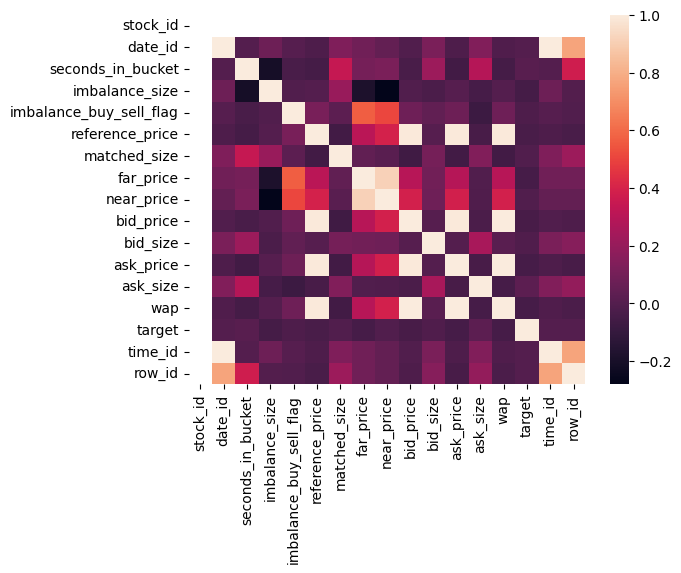

In [17]:
for i in range(1):
    sns.heatmap(df[df["stock_id"]==i].corr())

Axes(0.125,0.11;0.62x0.77)


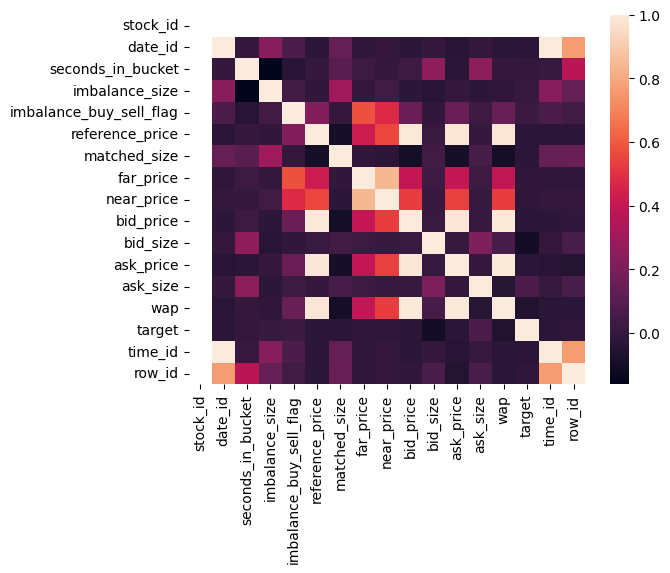

In [10]:
print(sns.heatmap(df[df["stock_id"]==1].corr()))

Axes(0.125,0.11;0.62x0.77)


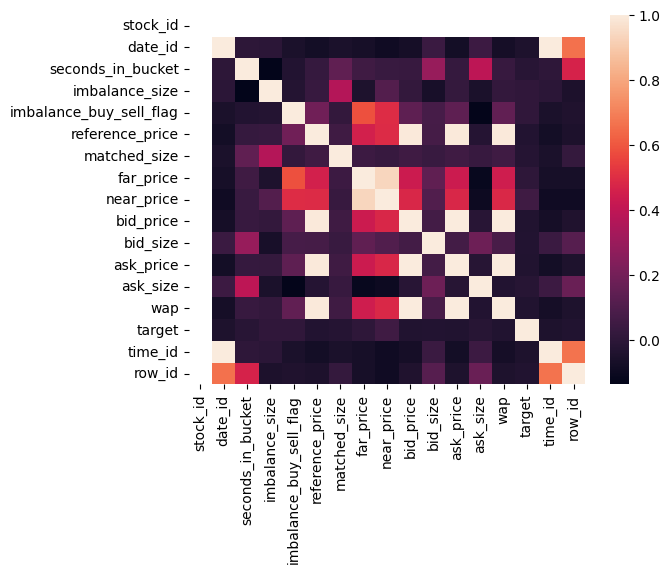

In [11]:
print(sns.heatmap(df[df["stock_id"]==199].corr()))

Axes(0.125,0.11;0.62x0.77)


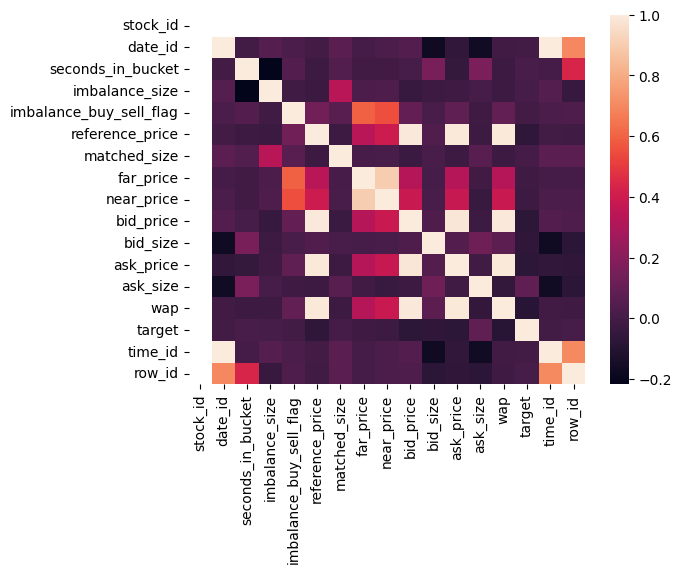

In [12]:
print(sns.heatmap(df[df["stock_id"]==150].corr()))

In [10]:
#3
dfs = []
for i in range(200):
    dfs.append(df[df["stock_id"]==i])

dfs

[Empty DataFrame
 Columns: [stock_id, date_id, seconds_in_bucket, imbalance_size, imbalance_buy_sell_flag, reference_price, matched_size, far_price, near_price, bid_price, bid_size, ask_price, ask_size, wap, target, time_id, row_id, sign_imb]
 Index: [],
 Empty DataFrame
 Columns: [stock_id, date_id, seconds_in_bucket, imbalance_size, imbalance_buy_sell_flag, reference_price, matched_size, far_price, near_price, bid_price, bid_size, ask_price, ask_size, wap, target, time_id, row_id, sign_imb]
 Index: [],
 Empty DataFrame
 Columns: [stock_id, date_id, seconds_in_bucket, imbalance_size, imbalance_buy_sell_flag, reference_price, matched_size, far_price, near_price, bid_price, bid_size, ask_price, ask_size, wap, target, time_id, row_id, sign_imb]
 Index: [],
 Empty DataFrame
 Columns: [stock_id, date_id, seconds_in_bucket, imbalance_size, imbalance_buy_sell_flag, reference_price, matched_size, far_price, near_price, bid_price, bid_size, ask_price, ask_size, wap, target, time_id, row_id, si

In [ ]:
for data in dfs:
    plt.plot(data["wap"])
    plt.plot(data[""])
    plt.show()

In [7]:
df0 = dfs[0][["sign_imb", "matched_size", "wap", "target"]]
df0

sign_imb  matched_size       wap    target
0        3180602.69   13380276.64  1.000000 -3.029704
191      1299772.70   15261106.63  0.999892  0.389814
382      1299772.70   15261106.63  0.999842  4.220009
573      1299772.70   15261106.63  1.000085  5.450249
764      1218204.43   15342674.90  1.000317  3.169775
...             ...           ...       ...       ...
5236980        0.00   42161928.97  0.999065  3.999472
5237180        0.00   42161928.97  0.998941  3.190041
5237380  -475513.69   41686415.27  0.999289 -0.169873
5237580  -475513.69   41686415.27  0.999291  3.110170
5237780  -475513.69   41686415.27  0.999242  0.760555

[26455 rows x 4 columns]

In [8]:
def test_stationarity(data):
    rolling_mean = data.rolling(window=7).mean()
    rolling_std = data.rolling(window=7).std()
    
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot(data, label='Original')
    ax.plot(rolling_mean, label='Rolling Mean')
    ax.plot(rolling_std, label='Rolling Std')
    
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    plt.title('Rolling Mean and Standard Deviation - {}'.format(data.name))
    plt.tight_layout()
    plt.show()
    
    result = adfuller(data)
    print('Augumented Dickey-Fuller Test')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

In [54]:
l = list(df0.columns)

In [ ]:
for i in range(len(l)):
    test_stationarity(df[df0.columns[i]])

In [22]:
var0 = VAR(df0.head(20000))
order0 = var0.select_order(maxlags=31)
order0.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [24]:
order0.bic

7

In [10]:
VAR0 = var0.fit(7)
target = "target"
coefficients = pd.DataFrame(VAR0.params[target])
p_values = pd.DataFrame(VAR0.pvalues[target])

df_VAR = pd.concat([coefficients, p_values], axis=1)
df_VAR.columns = ['Coefficients', 'p-values']

df_VAR_filtered = df_VAR[df_VAR['p-values'] < 0.1].dropna()
print(df_VAR_filtered)

                 Coefficients      p-values
L1.sign_imb      2.791828e-08  8.142198e-03
L1.wap           2.946323e+02  1.017444e-06
L1.target        8.177269e-01  0.000000e+00
L2.wap          -1.420888e+02  9.024016e-02
L2.target        2.321778e-02  1.054568e-02
L5.sign_imb      2.554123e-08  7.973692e-02
L5.wap           2.369224e+02  4.720645e-03
L6.sign_imb     -5.979088e-08  4.098464e-05
L6.wap          -1.448164e+03  7.446552e-67
L6.target       -4.135477e-01  0.000000e+00
L7.sign_imb      3.664429e-08  5.123494e-04
L7.matched_size  8.746389e-09  9.704992e-02
L7.wap           9.578174e+02  3.167758e-57
L7.target        3.389321e-01  0.000000e+00


In [11]:
VAR0.endog

array([[ 3.18060269e+06,  1.33802766e+07,  1.00000000e+00,
        -3.02970400e+00],
       [ 1.29977270e+06,  1.52611066e+07,  9.99892000e-01,
         3.89814380e-01],
       [ 1.29977270e+06,  1.52611066e+07,  9.99842000e-01,
         4.22000900e+00],
       ...,
       [ 9.07436630e+05,  2.30339531e+07,  1.00094400e+00,
        -4.43995000e+00],
       [ 9.41730460e+05,  2.30672471e+07,  1.00067900e+00,
        -2.95996670e+00],
       [ 1.04071264e+06,  2.30740459e+07,  1.00023700e+00,
         1.72019000e+00]])

In [57]:
prediction = VAR0.forecast(VAR0.endog,steps=6455)
pred=[]
for l in prediction:
    pred.append(l[3])
pred


[1.003991516769247,
 0.2417623932127526,
 3.050841361622929,
 0.7811139710383941,
 0.4084092392851062,
 -0.9695606169359507,
 -0.6565942940886771,
 -0.5428319786429938,
 -1.4107792270521031,
 -0.6621117559359391,
 -0.5164058200756472,
 -0.09908604474742333,
 -0.2117113748737438,
 -0.20680956763260383,
 0.059420418644322126,
 -0.19409005852901373,
 -0.24462801570632564,
 -0.36805685779233954,
 -0.32903824250388425,
 -0.34329807949256974,
 -0.42297727381060213,
 -0.33655211802954454,
 -0.3188211647330945,
 -0.2817552428491581,
 -0.29358226999954695,
 -0.28406365659793664,
 -0.2597288751886708,
 -0.2881118246104961,
 -0.2930860892099645,
 -0.3031950824274645,
 -0.2988899157778633,
 -0.30254661461037813,
 -0.30892531330937345,
 -0.2987245150978879,
 -0.29654748368352557,
 -0.29300082321572063,
 -0.293630734003159,
 -0.29146093696635944,
 -0.28910275925409223,
 -0.2919302491201279,
 -0.29202683001562946,
 -0.29252495151627045,
 -0.29186173848881936,
 -0.2921645361184346,
 -0.292327023540906

In [13]:
test = df0["target"].tail(6455)
len(test)

6455

In [14]:
statsmodels.tools.eval_measures.meanabs(pred, test)

4.1333348464061

In [8]:
#4
tests = []
for df in dfs:
    tests.append(df["target"].tail(6455))
tests

[3946980    1.130104
 3947180    2.019405
 3947380    6.999969
 3947580    1.380444
 3947780   -1.209974
              ...   
 5236980    3.999472
 5237180    3.190041
 5237380   -0.169873
 5237580    3.110170
 5237780    0.760555
 Name: target, Length: 6455, dtype: float64,
 3946981    -1.009703
 3947181     0.129938
 3947381    -8.869767
 3947581   -19.869804
 3947781   -14.150143
              ...    
 5236981     2.850294
 5237181     3.169775
 5237381     5.689859
 5237581    10.650158
 5237781    15.859604
 Name: target, Length: 6455, dtype: float64,
 3946982    11.889935
 3947182    17.800331
 3947382    22.939444
 3947582    26.730299
 3947782    22.679567
              ...    
 5236982    -4.450083
 5237182    -5.559921
 5237382    -5.310178
 5237582    -5.239844
 5237782    -1.549721
 Name: target, Length: 6455, dtype: float64,
 3946983   -4.199743
 3947183   -0.590086
 3947383   -0.929832
 3947583   -0.730157
 3947783   -0.180006
              ...   
 5236983    1.720190
 52

In [80]:
tests

[3946980    1.130104
 3947180    2.019405
 3947380    6.999969
 3947580    1.380444
 3947780   -1.209974
              ...   
 5236980    3.999472
 5237180    3.190041
 5237380   -0.169873
 5237580    3.110170
 5237780    0.760555
 Name: target, Length: 6455, dtype: float64,
 3946981    -1.009703
 3947181     0.129938
 3947381    -8.869767
 3947581   -19.869804
 3947781   -14.150143
              ...    
 5236981     2.850294
 5237181     3.169775
 5237381     5.689859
 5237581    10.650158
 5237781    15.859604
 Name: target, Length: 6455, dtype: float64,
 3946982    11.889935
 3947182    17.800331
 3947382    22.939444
 3947582    26.730299
 3947782    22.679567
              ...    
 5236982    -4.450083
 5237182    -5.559921
 5237382    -5.310178
 5237582    -5.239844
 5237782    -1.549721
 Name: target, Length: 6455, dtype: float64,
 3946983   -4.199743
 3947183   -0.590086
 3947383   -0.929832
 3947583   -0.730157
 3947783   -0.180006
              ...   
 5236983    1.720190
 52

In [28]:
type(tests[0])

pandas.core.series.Series

In [29]:
type(dfs[0])

pandas.core.frame.DataFrame

In [36]:
n=0
for df in dfs:
    print(n)
    print(df.isna().sum())
    n += 1
   #101, 131, 158

0
stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  14517
near_price                 14430
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
sign_imb                       0
dtype: int64
1
stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  14671
near_price                 14430
bid_price                      0
bid_size                       0
ask_price                 

In [18]:
#7
dfs_itp = []
for i in range(200):
    dfs_itp.append(df[df["stock_id"]==i].interpolate())

dfs_itp


[         stock_id  date_id  seconds_in_bucket  imbalance_size  \
 0               0        0                  0      3180602.69   
 191             0        0                 10      1299772.70   
 382             0        0                 20      1299772.70   
 573             0        0                 30      1299772.70   
 764             0        0                 40      1218204.43   
 ...           ...      ...                ...             ...   
 5236980         0      480                500            0.00   
 5237180         0      480                510            0.00   
 5237380         0      480                520       475513.69   
 5237580         0      480                530       475513.69   
 5237780         0      480                540       475513.69   
 
          imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
 0                              1         0.999812   13380276.64        NaN   
 191                            1         1.0000

In [13]:
#8
tests_itp = []
for df_ in dfs_itp:
    tests_itp.append(df_["target"].tail(6455).interpolate())
tests_itp

[3946980    1.130104
 3947180    2.019405
 3947380    6.999969
 3947580    1.380444
 3947780   -1.209974
              ...   
 5236980    3.999472
 5237180    3.190041
 5237380   -0.169873
 5237580    3.110170
 5237780    0.760555
 Name: target, Length: 6455, dtype: float64,
 3946981    -1.009703
 3947181     0.129938
 3947381    -8.869767
 3947581   -19.869804
 3947781   -14.150143
              ...    
 5236981     2.850294
 5237181     3.169775
 5237381     5.689859
 5237581    10.650158
 5237781    15.859604
 Name: target, Length: 6455, dtype: float64,
 3946982    11.889935
 3947182    17.800331
 3947382    22.939444
 3947582    26.730299
 3947782    22.679567
              ...    
 5236982    -4.450083
 5237182    -5.559921
 5237382    -5.310178
 5237582    -5.239844
 5237782    -1.549721
 Name: target, Length: 6455, dtype: float64,
 3946983   -4.199743
 3947183   -0.590086
 3947383   -0.929832
 3947583   -0.730157
 3947783   -0.180006
              ...   
 5236983    1.720190
 52

In [19]:
#9
def get_VAR_models(dfs, col_list):
    n=0
    models=[]
    data = []
    for ids in dfs:
        data.append(ids[col_list].head(20000))
    for stock in data:
        const = VAR(stock)
        select = const.select_order(maxlags=13)
        order = select.bic
        model = const.fit(order)
        models.append(model)
        print(n)
        n+=1
    # return models 
    return models

In [20]:
#10
models = get_VAR_models(dfs_itp, ["target","sign_imb", "matched_size","wap"])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [86]:
models

In [23]:
#11
def VAR_errors(models, tests):
    n = 0
    errors = []
    for i in range(len(models)):
        model = models[i]
        test = np.array(tests[i])
        prediction = model.forecast(model.endog,steps=6455)
        pred=[]
        for l in prediction:
            pred.append(l[0])
        pred = np.array(pred)
        error = abs(test-pred).sum()
        errors.append(error)
        print(n)
        n+=1
    return errors
        

In [24]:
#12
errors_VAR = VAR_errors(models, tests_itp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [25]:
errors_VAR

[26680.67641758292,
 54387.98372654746,
 47840.64762950719,
 23257.297536386148,
 25269.43434169444,
 49659.85142014119,
 39830.78761152558,
 38087.75898231865,
 34628.05273753093,
 33046.18109832839,
 29841.752383926047,
 73930.68208742917,
 27395.58851374145,
 34551.33839109925,
 28824.25135014217,
 34929.07410908268,
 40692.408432518016,
 38015.913026609574,
 52685.33678373357,
 51817.76677893869,
 33997.706180552785,
 32050.378682433682,
 41706.04377431814,
 32536.57453011589,
 27139.22264498537,
 33226.363788359406,
 38173.64811130279,
 36443.59162645348,
 33370.53495190108,
 32233.23838011756,
 30150.44294515853,
 111669.73338587739,
 28245.97571791918,
 52525.30684332928,
 36501.77765649619,
 28014.51679124255,
 35715.86370634695,
 26553.596682176074,
 30055.21989375561,
 27998.09051675806,
 42234.16664366369,
 33333.39436384603,
 58827.66830106174,
 37344.66606477198,
 30246.15872541463,
 21104.015252656885,
 36973.09905959519,
 35049.542011115496,
 33310.272023957834,
 39912.3

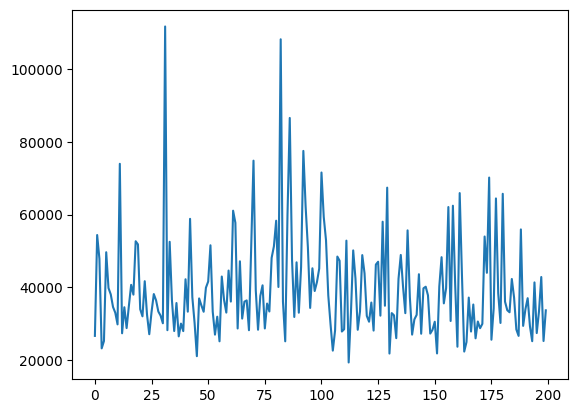

In [242]:
plt.plot(errors_VAR)

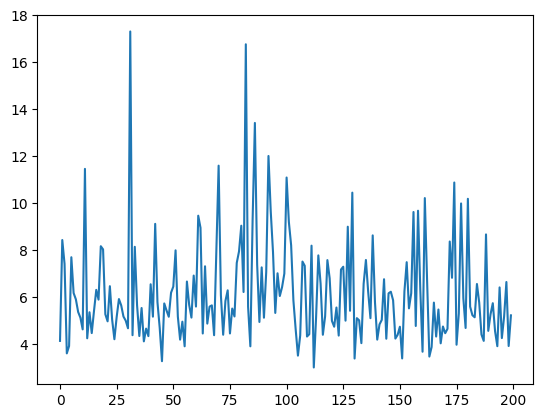

In [26]:
#13
each_mae = np.array(errors_VAR)/6455
plt.plot(each_mae)

In [244]:
total_mae = np.array(errors_VAR).sum()/(6455*200)
total_mae

6.143140539284447

In [27]:
#14
targets = pd.DataFrame(dfs_itp[0]["target"].to_numpy())
for df_ in dfs_itp[1:200]:
    targets = pd.concat([targets, pd.DataFrame(df_["target"].to_numpy())], axis=1)
targets.columns = [i for i in range(200)]
targets


0          1         2         3         4         5         6    \
0     -3.029704  -5.519986 -8.389950 -4.010200 -7.349849  6.779432 -2.499819   
1      0.389814  -1.620054 -7.460117 -1.040101 -6.719828  7.710457 -4.280209   
2      4.220009  -6.459951 -6.380081 -2.030134 -0.690222  1.009703  2.930164   
3      5.450249  -5.149841 -5.819797  1.130104 -2.589822 -3.089905  0.560284   
4      3.169775  -6.750226 -0.280142 -2.350211 -4.900098 -2.070069  2.199411   
...         ...        ...       ...       ...       ...       ...       ...   
26450  3.999472   2.850294 -4.450083  1.720190  1.939535 -4.569888 -0.630021   
26451  3.190041   3.169775 -5.559921  4.669428  2.139807  1.679659 -0.360012   
26452 -0.169873   5.689859 -5.310178  5.639792  1.660585  2.110004 -1.000166   
26453  3.110170  10.650158 -5.239844  5.229711  0.300407 -2.030134 -1.180172   
26454  0.760555  15.859604 -1.549721  3.160238  1.009703  2.340078  1.410246   

             7         8         9    ...       190        191        192  \
0      -1.959801 -5.970001  7.970333  ...  6.370544  11.940002 -11.529922   
1      -8.010268 -0.780225 -0.640154  ...  4.210472   2.599955 -15.599728   
2     -12.069941 -4.119873 -3.250241  ...  5.379915  -5.970001 -12.710094   
3      -6.909967 -1.090169 -6.759763  ... -3.269911   1.300573 -16.660095   
4      -1.209974 -3.100038 -8.199811  ... -2.009869  -0.969768  -9.229779   
...          ...       ...       ...  ...       ...        ...        ...   
26450  -1.729727 -0.680089  3.540516  ... -4.730225  -7.420182   2.959967   
26451  -3.240108  2.609491  1.679659  ... -3.340244  -3.479719   1.419783   
26452  -4.529953  5.409718  0.350475  ... -1.549721  -1.289845  -0.140071   
26453  -1.310110  3.240108  0.220537  ... -1.440048  -0.299811  -2.120137   
26454  -1.260042  3.679991 -1.609922  ... -0.470281   0.799894  -1.729727   

            193        194       195       196       197       198        199  
0     -6.489754   3.999472 -0.690222 -0.810027 -8.440018 -0.510216 -20.319820  
1     -1.749992  -9.030104 -1.320243 -3.259778 -4.410148 -1.419783 -10.240078  
2      2.160072  -9.999871  5.890131 -0.029802 -6.819964  2.599955  -9.179711  
3      4.090071  -9.340048  7.020235  1.549721  1.690388  3.010035  -6.459951  
4      5.700588 -11.489987  4.500151 -1.350045 -1.929998  4.669428  -6.089807  
...         ...        ...       ...       ...       ...       ...        ...  
26450 -2.359748  -0.650287  3.190041 -1.659989 -0.690222 -2.700090        NaN  
26451 -1.069903   2.319813  3.770590 -3.039837 -3.299713 -2.070069        NaN  
26452 -1.929998   4.609823  1.449585 -6.319881 -1.999736 -2.239943        NaN  
26453 -1.350045   3.110170  4.019737 -7.349849 -3.259778 -3.160238        NaN  
26454 -3.880262   4.839897  2.310276 -8.220077  1.169443 -1.540184        NaN  

[26455 rows x 200 columns]

In [116]:
targets.describe()

0             1             2             3             4    \
count  26455.000000  26455.000000  26455.000000  26455.000000  26455.000000   
mean      -0.261008     -0.119887      0.025008     -0.137963     -0.223907   
std        6.054234     11.585558     10.979600      5.268299      5.927555   
min      -69.419740    -80.819725   -170.210000    -57.849884    -43.579937   
25%       -3.430247     -6.830096     -5.795062     -3.079772     -3.629923   
50%       -0.129938     -0.110269     -0.079870     -0.069737     -0.169873   
75%        3.089905      6.710291      5.865097      2.839565      3.210306   
max       46.720505     62.069893    103.969574     45.739410     37.449600   

                5             6             7             8             9    \
count  26455.000000  26455.000000  26455.000000  26455.000000  26455.000000   
mean      -0.004130      0.051475      0.161170     -0.158821     -0.186524   
std       12.756494      8.893440      8.344569      8.477882      6.860723   
min     -302.230130    -62.680244    -59.840084    -51.550270    -99.480150   
25%       -5.530119     -5.149841     -4.600287     -5.220175     -3.830195   
50%       -0.029802      0.059605      0.120401     -0.169873     -0.180006   
75%        5.539656      5.329847      4.889965      4.885197      3.399849   
max      357.439500     54.769516     64.829590     65.499540     90.730194   

       ...           190           191           192           193  \
count  ...  26455.000000  26455.000000  26455.000000  26455.000000   
mean   ...      0.073910      0.409759      0.172872      0.147707   
std    ...      8.591323      8.549505      7.036316      6.388613   
min    ...    -57.020187    -62.729717    -56.530235    -58.799980   
25%    ...     -4.659891     -4.040003     -3.640056     -3.179908   
50%    ...      0.000000      0.289679      0.189543      0.059605   
75%    ...      4.620552      4.810095      4.040003      3.429651   
max    ...    105.259415     64.860580     63.220260    118.139984   

                194           195           196           197           198  \
count  26455.000000  26455.000000  26455.000000  26455.000000  26455.000000   
mean      -0.032751     -0.260326      0.090782      0.126965     -0.323923   
std        9.120194      6.144210      7.213802      8.674533      5.956440   
min      -76.829790    -51.580070    -63.149930    -77.009796    -50.730110   
25%       -5.300045     -3.709793     -3.929734     -4.569888     -3.460050   
50%       -0.150204     -0.159740      0.079870      0.070333     -0.169873   
75%        5.199909      3.349781      4.169941      4.760027      2.959967   
max       60.609580     37.709473     49.099922     67.609550     59.930084   

                199  
count  21615.000000  
mean       0.132373  
std        9.060902  
min      -60.830116  
25%       -5.009770  
50%        0.089407  
75%        5.099773  
max       79.900024  

[8 rows x 200 columns]

In [123]:
targets[199]

0       -20.319820
1       -10.240078
2        -9.179711
3        -6.459951
4        -6.089807
           ...    
26450          NaN
26451          NaN
26452          NaN
26453          NaN
26454          NaN
Name: 199, Length: 26455, dtype: float64

In [130]:
k = list(targets[199].dropna())

In [136]:
l = [0 for i in range(4840)]
df199 = l+k

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [138]:
targets[199] = pd.DataFrame(np.array(df199))

In [139]:
targets

0          1         2         3         4         5         6    \
0     -3.029704  -5.519986 -8.389950 -4.010200 -7.349849  6.779432 -2.499819   
1      0.389814  -1.620054 -7.460117 -1.040101 -6.719828  7.710457 -4.280209   
2      4.220009  -6.459951 -6.380081 -2.030134 -0.690222  1.009703  2.930164   
3      5.450249  -5.149841 -5.819797  1.130104 -2.589822 -3.089905  0.560284   
4      3.169775  -6.750226 -0.280142 -2.350211 -4.900098 -2.070069  2.199411   
...         ...        ...       ...       ...       ...       ...       ...   
26450  3.999472   2.850294 -4.450083  1.720190  1.939535 -4.569888 -0.630021   
26451  3.190041   3.169775 -5.559921  4.669428  2.139807  1.679659 -0.360012   
26452 -0.169873   5.689859 -5.310178  5.639792  1.660585  2.110004 -1.000166   
26453  3.110170  10.650158 -5.239844  5.229711  0.300407 -2.030134 -1.180172   
26454  0.760555  15.859604 -1.549721  3.160238  1.009703  2.340078  1.410246   

             7         8         9    ...       190        191        192  \
0      -1.959801 -5.970001  7.970333  ...  6.370544  11.940002 -11.529922   
1      -8.010268 -0.780225 -0.640154  ...  4.210472   2.599955 -15.599728   
2     -12.069941 -4.119873 -3.250241  ...  5.379915  -5.970001 -12.710094   
3      -6.909967 -1.090169 -6.759763  ... -3.269911   1.300573 -16.660095   
4      -1.209974 -3.100038 -8.199811  ... -2.009869  -0.969768  -9.229779   
...          ...       ...       ...  ...       ...        ...        ...   
26450  -1.729727 -0.680089  3.540516  ... -4.730225  -7.420182   2.959967   
26451  -3.240108  2.609491  1.679659  ... -3.340244  -3.479719   1.419783   
26452  -4.529953  5.409718  0.350475  ... -1.549721  -1.289845  -0.140071   
26453  -1.310110  3.240108  0.220537  ... -1.440048  -0.299811  -2.120137   
26454  -1.260042  3.679991 -1.609922  ... -0.470281   0.799894  -1.729727   

            193        194       195       196       197       198       199  
0     -6.489754   3.999472 -0.690222 -0.810027 -8.440018 -0.510216  0.000000  
1     -1.749992  -9.030104 -1.320243 -3.259778 -4.410148 -1.419783  0.000000  
2      2.160072  -9.999871  5.890131 -0.029802 -6.819964  2.599955  0.000000  
3      4.090071  -9.340048  7.020235  1.549721  1.690388  3.010035  0.000000  
4      5.700588 -11.489987  4.500151 -1.350045 -1.929998  4.669428  0.000000  
...         ...        ...       ...       ...       ...       ...       ...  
26450 -2.359748  -0.650287  3.190041 -1.659989 -0.690222 -2.700090 -7.209778  
26451 -1.069903   2.319813  3.770590 -3.039837 -3.299713 -2.070069 -9.750128  
26452 -1.929998   4.609823  1.449585 -6.319881 -1.999736 -2.239943  3.629923  
26453 -1.350045   3.110170  4.019737 -7.349849 -3.259778 -3.160238  4.760027  
26454 -3.880262   4.839897  2.310276 -8.220077  1.169443 -1.540184 -6.530285  

[26455 rows x 200 columns]

<Axes: >

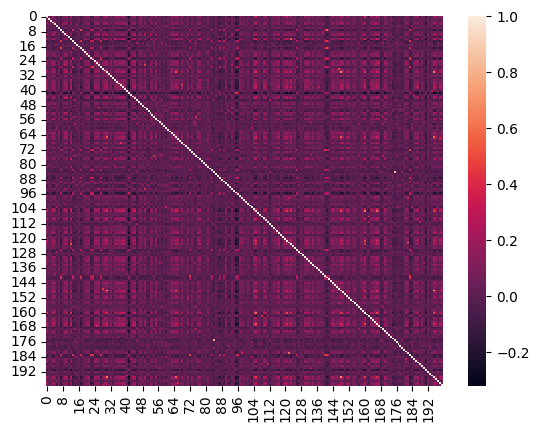

In [140]:
sns.heatmap(targets.corr())

In [28]:
#15
corr_ = targets.corr()
corr_

0         1         2         3         4         5         6    \
0    1.000000  0.026295 -0.004043  0.207819  0.070960 -0.042453  0.054963   
1    0.026295  1.000000  0.037332  0.019729  0.065891 -0.006047  0.029066   
2   -0.004043  0.037332  1.000000  0.018223  0.021861  0.027507  0.024725   
3    0.207819  0.019729  0.018223  1.000000  0.145548 -0.077973  0.074544   
4    0.070960  0.065891  0.021861  0.145548  1.000000 -0.028629  0.048819   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.232600  0.026791  0.038424  0.322643  0.127395 -0.069962  0.076628   
196  0.143268  0.024163  0.035848  0.171431  0.091576 -0.041144  0.072984   
197  0.033012  0.015073  0.039553  0.004770 -0.002969  0.118457  0.009454   
198  0.192260  0.009603  0.018218  0.224891  0.128412 -0.044507  0.054511   
199  0.006843  0.017923  0.003185  0.000777  0.021827 -0.009761  0.018826   

          7         8         9    ...       190       191       192  \
0   -0.086840  0.034118  0.106024  ...  0.038969 -0.141738  0.044828   
1   -0.021007  0.021238  0.011776  ...  0.022942 -0.041302  0.030959   
2   -0.021584  0.018639  0.035248  ... -0.000604 -0.041416  0.040231   
3   -0.118997  0.050939  0.222614  ... -0.001498 -0.166461  0.067439   
4   -0.063989  0.185668  0.146976  ...  0.003154 -0.136737  0.048340   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.176688  0.023607  0.236438  ... -0.017945 -0.167413  0.066452   
196 -0.117987  0.053301  0.183307  ...  0.005767 -0.123057  0.100574   
197 -0.038573  0.008140  0.003063  ...  0.015993 -0.076817  0.058151   
198 -0.137019  0.057304  0.136351  ...  0.003957 -0.176620  0.057344   
199 -0.009759  0.000968 -0.004853  ...  0.001062 -0.007084  0.000654   

          193       194       195       196       197       198       199  
0   -0.028024 -0.027307  0.232600  0.143268  0.033012  0.192260  0.006843  
1   -0.047121  0.041966  0.026791  0.024163  0.015073  0.009603  0.017923  
2   -0.017172  0.031457  0.038424  0.035848  0.039553  0.018218  0.003185  
3    0.025721 -0.011217  0.322643  0.171431  0.004770  0.224891  0.000777  
4   -0.035436  0.130102  0.127395  0.091576 -0.002969  0.128412  0.021827  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.052417 -0.023852  1.000000  0.245820 -0.001317  0.271404  0.004690  
196 -0.037637  0.053482  0.245820  1.000000  0.003611  0.157663  0.008449  
197  0.037720  0.017917 -0.001317  0.003611  1.000000  0.006747  0.007946  
198  0.008433  0.003307  0.271404  0.157663  0.006747  1.000000  0.009480  
199  0.020006 -0.012246  0.004690  0.008449  0.007946  0.009480  1.000000  

[200 rows x 200 columns]

In [29]:
#16
high_corrs = []
for i in range(200):
    high_corrs.append(corr_[i][corr_[i]>0.3])
high_corrs

[0      1.000000
 105    0.339906
 121    0.319080
 160    0.408837
 Name: 0, dtype: float64,
 1    1.0
 Name: 1, dtype: float64,
 2    1.0
 Name: 2, dtype: float64,
 3      1.000000
 30     0.301465
 105    0.357191
 148    0.329767
 160    0.338809
 195    0.322643
 Name: 3, dtype: float64,
 4    1.0
 Name: 4, dtype: float64,
 5    1.0
 Name: 5, dtype: float64,
 6    1.0
 Name: 6, dtype: float64,
 7      1.000000
 13     0.416141
 17     0.469036
 23     0.312682
 89     0.320745
 126    0.305674
 141    0.576120
 183    0.375373
 Name: 7, dtype: float64,
 8    1.0
 Name: 8, dtype: float64,
 9     1.000000
 26    0.304169
 52    0.309160
 Name: 9, dtype: float64,
 10    1.000000
 44    0.356784
 Name: 10, dtype: float64,
 11    1.0
 Name: 11, dtype: float64,
 12     1.000000
 34     0.323178
 38     0.301508
 77     0.346741
 104    0.307276
 105    0.379103
 121    0.308433
 123    0.527095
 131    0.316371
 148    0.308231
 160    0.400751
 166    0.340852
 195    0.307280
 Name: 1

In [30]:
#17
hcindx = []
for i in range(200):
    ind = list(high_corrs[i].index)
    ind = [j for j in ind if j != i]
    hcindx.append(ind)
hcindx

[[105, 121, 160],
 [],
 [],
 [30, 105, 148, 160, 195],
 [],
 [],
 [],
 [13, 17, 23, 89, 126, 141, 183],
 [],
 [26, 52],
 [44],
 [],
 [34, 38, 77, 104, 105, 121, 123, 131, 148, 160, 166, 195],
 [7, 17, 22, 23, 27, 87, 89, 141, 183],
 [],
 [],
 [],
 [7, 13, 22, 23, 27, 89, 141, 183],
 [],
 [],
 [],
 [],
 [13, 17, 23, 27, 87, 96, 141, 183],
 [7, 13, 17, 22, 27, 72, 87, 96, 126, 140, 141, 183],
 [],
 [167],
 [9, 49, 93],
 [13, 17, 22, 23, 72, 87, 141, 183],
 [147],
 [],
 [3, 44, 65, 105, 121, 123, 148, 160, 166, 195],
 [],
 [],
 [],
 [12, 77, 123],
 [],
 [],
 [68],
 [12, 105, 121, 123, 148, 160, 166, 187, 195],
 [],
 [194],
 [95],
 [],
 [],
 [10, 30, 105, 160],
 [],
 [],
 [],
 [],
 [26, 93],
 [],
 [],
 [9],
 [],
 [75],
 [],
 [],
 [],
 [],
 [],
 [103],
 [],
 [],
 [],
 [],
 [30, 105, 148, 160, 166, 195],
 [198],
 [],
 [37],
 [],
 [],
 [152],
 [23, 27, 140, 141, 183],
 [],
 [],
 [54],
 [],
 [12, 34, 123, 131],
 [],
 [],
 [],
 [],
 [],
 [126, 140, 183],
 [175],
 [],
 [],
 [13, 22, 23, 27, 96, 

In [31]:
#18
full_dfs = []
for i in range(200):
    org = dfs_itp[i]
    if bool(hcindx[i]):
        for j, indx in enumerate(hcindx[i]):
            org[indx] = np.array(targets[indx])
    full_dfs.append(org)
full_dfs

[         stock_id  date_id  seconds_in_bucket  imbalance_size  \
 0               0        0                  0      3180602.69   
 191             0        0                 10      1299772.70   
 382             0        0                 20      1299772.70   
 573             0        0                 30      1299772.70   
 764             0        0                 40      1218204.43   
 ...           ...      ...                ...             ...   
 5236980         0      480                500            0.00   
 5237180         0      480                510            0.00   
 5237380         0      480                520       475513.69   
 5237580         0      480                530       475513.69   
 5237780         0      480                540       475513.69   
 
          imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
 0                              1         0.999812   13380276.64        NaN   
 191                            1         1.0000

In [32]:
#19
def VAR_errors_2(models, tests):
    n = 0
    errors = []
    for i in range(len(models)):
        model = models[i]
        test = np.array(tests[i])
        prediction = model.forecast(model.endog,steps=6455)
        pred=[]
        for l in prediction:
            pred.append(l[0])
        pred = np.array(pred)
        error = abs(test-pred).sum()
        errors.append(error)
        print(n)
        n+=1
    return errors
        

In [193]:
col_list = list(full_dfs[0].columns)
print(col_list)
rmv = ['stock_id','date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag','reference_price','far_price','near_price','bid_price','bid_size','ask_price','ask_size','row_id']
for col in rmv:
    col_list.remove(col)
col_list

['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target', 'time_id', 'row_id', 'sign_imb', 105, 121, 160]


['matched_size', 'wap', 'target', 'time_id', 'sign_imb', 105, 121, 160]

In [33]:
#20
def get_VAR_models_2(dfs):
    n=0
    models=[]
    data = []
    for ids in dfs:
        col_list = list(ids.columns)
        rmv = ['stock_id','date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag','reference_price','far_price','near_price','bid_price','bid_size','ask_price','ask_size','time_id','row_id', "target"]
        for col in rmv:
            col_list.remove(col)
        col_list_ = ["target"] + col_list
        print(col_list_)
        data.append(ids[col_list_].head(20000)) 
    for stock in data:
        const = VAR(stock)
        select = const.select_order(maxlags=13)
        order = select.bic
        print(order)
        model = const.fit(order)
        models.append(model)
        print(n)
        n+=1
    # return models 
    return models

In [34]:
#21
models2 = get_VAR_models_2(full_dfs)

['target', 'matched_size', 'wap', 'sign_imb', 105, 121, 160]
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb', 30, 105, 148, 160, 195]
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb', 13, 17, 23, 89, 126, 141, 183]
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb', 26, 52]
['target', 'matched_size', 'wap', 'sign_imb', 44]
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb', 34, 38, 77, 104, 105, 121, 123, 131, 148, 160, 166, 195]
['target', 'matched_size', 'wap', 'sign_imb', 7, 17, 22, 23, 27, 87, 89, 141, 183]
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_imb']
['target', 'matched_size', 'wap', 'sign_im

In [225]:
models2[0].endog

array([[ 1.33802766e+07,  1.00000000e+00, -3.02970400e+00, ...,
        -1.27971170e+00, -2.02000140e+00, -2.58028500e+00],
       [ 1.52611066e+07,  9.99892000e-01,  3.89814380e-01, ...,
         4.10079960e-01,  5.60283660e-01,  7.29560850e-01],
       [ 1.52611066e+07,  9.99842000e-01,  4.22000900e+00, ...,
         4.68015670e+00,  6.17980960e+00,  5.99980350e+00],
       ...,
       [ 2.30339531e+07,  1.00094400e+00, -4.43995000e+00, ...,
        -7.19010830e+00, -4.68015670e+00, -3.04996970e+00],
       [ 2.30672471e+07,  1.00067900e+00, -2.95996670e+00, ...,
        -4.23014160e+00, -3.07023530e+00, -3.13997270e+00],
       [ 2.30740459e+07,  1.00023700e+00,  1.72019000e+00, ...,
        -2.62975700e+00, -3.38017940e+00, -4.76002700e+00]])

In [35]:
#22
errors_VAR2 = VAR_errors_2(models2, tests_itp)
errors_VAR2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


[26681.086756500918,
 54387.98372278507,
 47840.64763052561,
 23252.96902636737,
 25269.43434073034,
 49659.83839984402,
 39830.788524291216,
 38087.88813362018,
 34628.052843551675,
 33048.31730484404,
 29846.15761146709,
 73930.68264470156,
 27402.627048560767,
 34551.104252545294,
 28824.251384355917,
 34929.07357774108,
 40692.40917700369,
 38019.94604400608,
 52685.337096082745,
 51817.76640026271,
 33997.70617006502,
 32050.378676838434,
 41701.747335152606,
 32531.35562930254,
 27139.222676024216,
 33229.38766231471,
 38173.74597658345,
 36444.78668885157,
 33372.45415631727,
 32233.23934631446,
 30151.399425879317,
 111669.73338554392,
 28245.97571869171,
 52525.30685548062,
 36504.8252808308,
 28014.51672589559,
 35715.863648706174,
 26553.850313298346,
 30051.32207382943,
 27998.090561844154,
 42233.485237004264,
 33332.908725025445,
 58827.66825188587,
 37344.66606141452,
 30247.043097166566,
 21104.01593406959,
 36973.0996662573,
 35049.542014675106,
 33310.2720251123,
 399

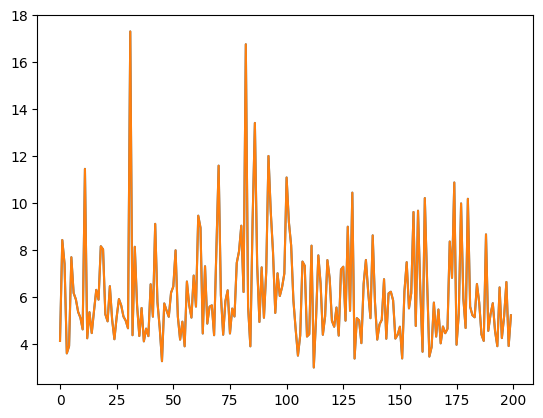

In [36]:
#23
each_mae2 = np.array(errors_VAR2)/6455
plt.plot(each_mae2)
plt.plot(each_mae)

In [37]:
total_mae2 = np.array(errors_VAR2).sum()/(6455*200)
total_mae2

6.143122849431102

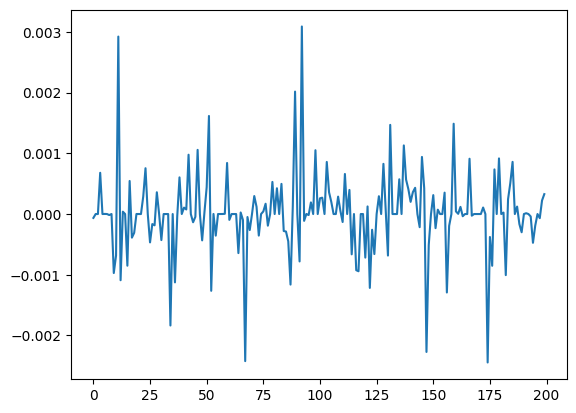

In [232]:
plt.plot(each_mae-each_mae2)

In [38]:
#24
def min_mae(maes_list):
    min_mae_index = []
    for i in range(200):
        maes = []
        for mae in maes_list:
            maes.append(mae[i])
        min_mae_index.append(maes.index(min(maes)))
    return min_mae_index

def select_model(maes_list, model_list):
    index = min_mae(maes_list)
    selected_models = []
    for i in range(200):
        models_ = []
        for model in model_list:
            models_.append(model[i])
        selected = models_[index[i]]
        selected_models.append(selected)
    return selected_models
    

In [245]:
selected_ = select_model([each_mae, each_mae2], [models, models2])
selected_

In [246]:
error_selected1 = VAR_errors_2(selected_, tests_itp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


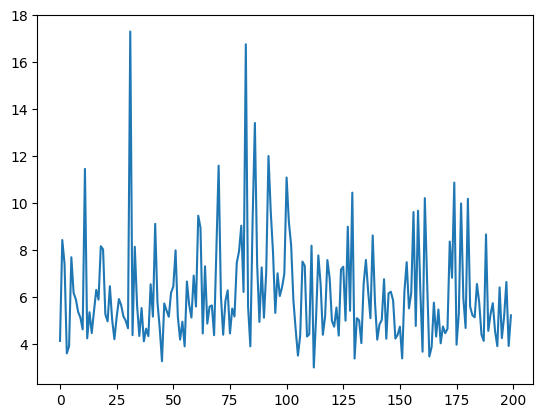

In [249]:
each_mae_sel1 = np.array(error_selected1)/6455
plt.plot(each_mae_sel1)

In [250]:
total_mae_sel1 = np.array(error_selected1).sum()/(6455*200)
total_mae_sel1

6.142948086753884

In [252]:
print("overall MAE")
print(each_mae_sel1.mean())
print("\n")
print(each_mae_sel1.min())
print("\n")
print(each_mae_sel1.max())

overall MAE
6.142948086753884


3.001957801114172


17.299726317506376


In [ ]:
#PCA dataframe construction

In [254]:
full_dfs

[         stock_id  date_id  seconds_in_bucket  imbalance_size  \
 0               0        0                  0      3180602.69   
 191             0        0                 10      1299772.70   
 382             0        0                 20      1299772.70   
 573             0        0                 30      1299772.70   
 764             0        0                 40      1218204.43   
 ...           ...      ...                ...             ...   
 5236980         0      480                500            0.00   
 5237180         0      480                510            0.00   
 5237380         0      480                520       475513.69   
 5237580         0      480                530       475513.69   
 5237780         0      480                540       475513.69   
 
          imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
 0                              1         0.999812   13380276.64        NaN   
 191                            1         1.0000

In [ ]:
full_dfs[0].columns

In [39]:
#25
filt_full_dfs = []
for full in full_dfs:
    col_list = list(full.columns)
    rmv = ['stock_id','date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag','far_price','near_price','time_id','row_id',"target"]
    for col in rmv:
        col_list.remove(col)
    filt_full_dfs.append(full[col_list])
filt_full_dfs

[         reference_price  matched_size  bid_price   bid_size  ask_price  \
 0               0.999812   13380276.64   0.999812   60651.50   1.000026   
 191             1.000026   15261106.63   0.999812   13996.50   1.000026   
 382             0.999919   15261106.63   0.999812    4665.50   0.999919   
 573             1.000133   15261106.63   1.000026   55998.00   1.000133   
 764             1.000455   15342674.90   1.000241   14655.95   1.000455   
 ...                  ...           ...        ...        ...        ...   
 5236980         0.999017   42161928.97   0.999017   53827.20   0.999193   
 5237180         0.998842   42161928.97   0.998842  157865.40   0.999017   
 5237380         0.999193   41686415.27   0.999193   57596.67   0.999368   
 5237580         0.999193   41686415.27   0.999193  156610.53   0.999368   
 5237780         0.999193   41686415.27   0.999193  110123.01   0.999368   
 
           ask_size       wap    sign_imb       105        121       160  
 0         

In [40]:
#26
for filt in filt_full_dfs:
    filt.columns = filt.columns.astype(str)
filt_full_dfs

[         reference_price  matched_size  bid_price   bid_size  ask_price  \
 0               0.999812   13380276.64   0.999812   60651.50   1.000026   
 191             1.000026   15261106.63   0.999812   13996.50   1.000026   
 382             0.999919   15261106.63   0.999812    4665.50   0.999919   
 573             1.000133   15261106.63   1.000026   55998.00   1.000133   
 764             1.000455   15342674.90   1.000241   14655.95   1.000455   
 ...                  ...           ...        ...        ...        ...   
 5236980         0.999017   42161928.97   0.999017   53827.20   0.999193   
 5237180         0.998842   42161928.97   0.998842  157865.40   0.999017   
 5237380         0.999193   41686415.27   0.999193   57596.67   0.999368   
 5237580         0.999193   41686415.27   0.999193  156610.53   0.999368   
 5237780         0.999193   41686415.27   0.999193  110123.01   0.999368   
 
           ask_size       wap    sign_imb       105        121       160  
 0         

In [41]:
#27
norm_filt = []
for filt_ in filt_full_dfs:
    norm = (filt_ - filt_.mean())/filt_.std()
    norm_filt.append(norm)
norm_filt

[         reference_price  matched_size  bid_price  bid_size  ask_price  \
 0              -0.013518     -0.587909   0.045702  0.326687   0.042624   
 191             0.113973     -0.498553   0.045702 -0.292750   0.042624   
 382             0.050228     -0.498553   0.045702 -0.416637  -0.021117   
 573             0.177718     -0.498553   0.173495  0.264903   0.106365   
 764             0.369550     -0.494678   0.301885 -0.283994   0.298183   
 ...                  ...           ...        ...       ...        ...   
 5236980        -0.487140      0.779477  -0.429042  0.236081  -0.453600   
 5237180        -0.591397      0.779477  -0.533545  1.617393  -0.558445   
 5237380        -0.382288      0.756886  -0.323941  0.286128  -0.349351   
 5237580        -0.382288      0.756886  -0.323941  1.600733  -0.349351   
 5237780        -0.382288      0.756886  -0.323941  0.983519  -0.349351   
 
          ask_size       wap  sign_imb       105       121       160  
 0       -0.517844  0.09403

In [347]:
n=0
for _df_ in norm_filt:
    print(n)
    print(_df_.isna().sum())
    n += 1

0
reference_price    0
matched_size       0
bid_price          0
bid_size           0
ask_price          0
ask_size           0
wap                0
sign_imb           0
105                0
121                0
160                0
dtype: int64
1
reference_price    0
matched_size       0
bid_price          0
bid_size           0
ask_price          0
ask_size           0
wap                0
sign_imb           0
dtype: int64
2
reference_price    0
matched_size       0
bid_price          0
bid_size           0
ask_price          0
ask_size           0
wap                0
sign_imb           0
dtype: int64
3
reference_price    0
matched_size       0
bid_price          0
bid_size           0
ask_price          0
ask_size           0
wap                0
sign_imb           0
30                 0
105                0
148                0
160                0
195                0
dtype: int64
4
reference_price    0
matched_size       0
bid_price          0
bid_size           0
ask_price     

In [280]:
pca0 = PCA(n_components=11)
pca0.fit(norm_filt[0])

PCA(n_components=11)

In [281]:
pca0_ex = pca0.explained_variance_ratio_
pca0_ex

array([3.63396342e-01, 1.85528057e-01, 1.21092339e-01, 9.18133441e-02,
       8.27048519e-02, 6.74908230e-02, 5.29711766e-02, 3.37505340e-02,
       6.60342390e-04, 4.78976860e-04, 1.13213730e-04])

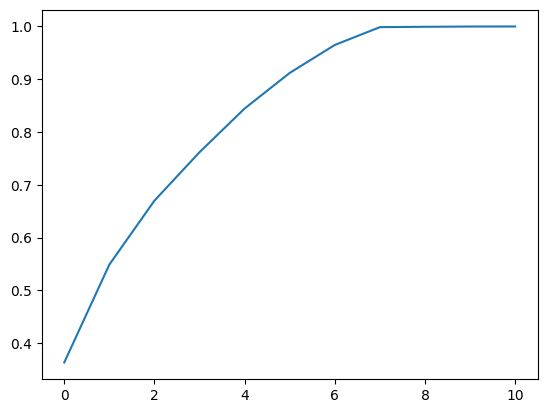

In [282]:
pca0_cuex = np.cumsum(pca0_ex)
plt.plot(pca0_cuex)

In [289]:
n = 0
exvar = 0
while exvar<0.85:
    exvar += pca0_ex[n]
    print(exvar)
    n+=1
print(n)

0.3633963417338836
0.5489243984035863
0.6700167375220776
0.7618300816140989
0.8445349334988069
0.9120257564504806
6


In [283]:
pca0.components_

array([[ 4.98355134e-01, -4.10419624e-02,  4.98786665e-01,
         1.92103885e-03,  4.98937823e-01, -2.67800707e-02,
         4.99370098e-01,  9.07027444e-03, -3.05959215e-02,
        -2.48064433e-02, -2.24840528e-02],
       [ 2.30580660e-02, -2.29154314e-02,  2.25923342e-02,
         4.28973443e-03,  2.02700489e-02,  1.21203168e-03,
         2.18954321e-02,  1.10355697e-02,  5.83176343e-01,
         5.37593712e-01,  6.06876602e-01],
       [ 1.66052449e-02,  4.42484097e-01,  2.14221943e-02,
         6.23739177e-01,  1.41504562e-02,  6.43010457e-01,
         1.71097660e-02, -2.95715211e-03,  1.16333680e-02,
         1.20696476e-02, -1.33204455e-02],
       [ 2.80138630e-04, -2.03919148e-01,  4.26591373e-03,
        -5.43383434e-03,  3.12881434e-03,  1.41882879e-01,
         1.08388153e-03, -9.67587433e-01,  1.17129808e-02,
        -3.32592500e-02,  2.75436013e-02],
       [-1.72090905e-02, -8.63965188e-01, -1.38308998e-02,
         4.11067698e-01, -2.01577529e-02,  1.98470649e-01,
  

In [309]:
pca00 = norm_filt[0].dot(pca0.components_[10])
pca00

0          0.030994
191       -0.009175
382       -0.008005
573        0.005452
764       -0.011951
             ...   
5236980   -0.001609
5237180    0.004650
5237380    0.001841
5237580    0.004433
5237780    0.016669
Length: 26455, dtype: float64

In [64]:
#28
pca_dfs = []
m=0
for norm_ in norm_filt:
    tar___ = full_dfs[m]
    tar__ = tar___["target"]
    tar_ = tar__.reset_index()
    tar = tar_["target"]
    pca_mod = PCA()
    pca_mod.fit(norm_)
    pca_ncomp = 0
    exvar = 0
    #print(pca_mod.explained_variance_ratio_)
    while exvar<0.85:
        exvar += pca_mod.explained_variance_ratio_[pca_ncomp]
        #print(exvar)
        #print(pca_ncomp)
        pca_ncomp+=1
    print(pca_ncomp)
    for i in range(pca_ncomp):
        #print(i)
        pca = pd.DataFrame({f"pca{i}":list(norm_.dot(pca_mod.components_[i]))})
        tar = pd.concat([tar, pca],axis=1)
    pca_dfs.append(tar)
    m+=1
pca_dfs

6
4
3
6
4
4
4
9
4
5
5
4
12
10
4
4
4
9
4
4
4
4
9
12
4
5
6
9
5
4
10
4
4
4
6
4
4
5
9
4
5
5
4
4
7
4
4
4
4
5
4
4
5
4
5
4
4
4
4
4
5
4
4
4
4
7
5
4
4
4
4
5
7
4
4
5
4
7
4
4
4
4
4
6
5
4
4
8
4
7
4
4
4
5
4
6
8
4
5
4
4
4
4
5
7
15
4
4
4
5
5
5
4
4
4
4
4
4
4
4
4
9
5
11
4
4
7
4
4
4
4
6
4
4
4
4
4
5
4
4
7
12
4
4
5
4
4
5
11
4
4
5
5
4
3
4
4
4
4
4
15
4
5
5
4
4
10
5
4
4
4
4
3
4
4
5
4
4
4
4
4
5
5
13
4
5
4
6
5
3
4
4
4
4
5
11
4
4
6
4


[         target      pca0      pca1      pca2      pca3      pca4      pca5
 0     -3.029704  0.149638 -0.514949 -0.386785 -0.368039  0.636313  0.462051
 1      0.389814  0.133563  0.262897 -0.564521 -0.141846  0.295049 -0.096446
 2      4.220009 -0.008470  1.802661 -0.765103 -0.160160  0.173382 -0.029918
 3      5.450249  0.224396  2.201674  0.047405 -0.075355  0.554060 -0.006362
 4      3.169775  0.548127  2.355485 -0.492392 -0.123033  0.244496 -0.139942
 ...         ...       ...       ...       ...       ...       ...       ...
 26450  3.999472 -1.045454  1.121062  1.662086  0.027528 -0.180217 -1.103053
 26451  3.190041 -1.224180  1.133012  2.236673 -0.052991  0.312760  0.123423
 26452 -0.169873 -0.771145  1.003912  0.592825 -0.191665 -0.486086  0.149309
 26453  3.110170 -0.825862  1.492997  2.263081 -0.005926  0.302097  0.074637
 26454  0.760555 -0.934082  1.860406  3.697732  0.307443  0.632288 -2.446827
 
 [26455 rows x 7 columns],
           target      pca0      pca1      pca2

In [351]:
pca_dfs[1]

target      pca0      pca1      pca2      pca3
0      -5.519986  0.117887 -0.494697  0.072550 -0.078189
1      -1.620054  0.121228 -0.213994 -0.001500 -0.063941
2      -6.459951  0.121228 -0.213994 -0.001500 -0.063941
3      -5.149841  0.080321 -0.825122  0.157561 -0.111002
4      -6.750226  0.120296 -0.479269  0.104307 -0.264812
...          ...       ...       ...       ...       ...
26450   2.850294 -2.279195  4.010350 -0.758848 -1.177238
26451   3.169775 -2.304152  0.103874  0.038669  0.249163
26452   5.689859 -2.308854  0.941896 -0.179779  0.278700
26453  10.650158 -2.310191  1.568817 -0.338814  0.280422
26454  15.859604 -2.346615  2.682372 -0.798741  0.546678

[26455 rows x 5 columns]

In [352]:
n=0
for _df_ in pca_dfs:
    print(n)
    print(_df_.isna().sum())
    n += 1

0
target    0
pca0      0
pca1      0
pca2      0
pca3      0
pca4      0
dtype: int64
1
target    0
pca0      0
pca1      0
pca2      0
pca3      0
dtype: int64
2
target    0
pca0      0
pca1      0
pca2      0
dtype: int64
3
target    0
pca0      0
pca1      0
pca2      0
pca3      0
pca4      0
pca5      0
dtype: int64
4
target    0
pca0      0
pca1      0
pca2      0
pca3      0
dtype: int64
5
target    0
pca0      0
pca1      0
pca2      0
pca3      0
dtype: int64
6
target    0
pca0      0
pca1      0
pca2      0
pca3      0
dtype: int64
7
target    0
pca0      0
pca1      0
pca2      0
pca3      0
pca4      0
pca5      0
pca6      0
pca7      0
dtype: int64
8
target    0
pca0      0
pca1      0
pca2      0
pca3      0
dtype: int64
9
target    0
pca0      0
pca1      0
pca2      0
pca3      0
pca4      0
dtype: int64
10
target    0
pca0      0
pca1      0
pca2      0
pca3      0
dtype: int64
11
target    0
pca0      0
pca1      0
pca2      0
pca3      0
dtype: int64
12
target    0

In [65]:
#29
def get_VAR_models_coled(dfs):
    n=0
    models=[]
    data = []
    for ids in dfs:
        col_list = list(ids.columns)
        data.append(ids[col_list].head(20000))
    for stock in data:
        const = VAR(stock)
        select = const.select_order(maxlags=13)
        order = select.bic
        model = const.fit(order)
        models.append(model)
        print(n)
        n+=1
    # return models 
    return models

In [66]:
#30
pcamodels = get_VAR_models_coled(pca_dfs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [67]:
#31
def VAR_errors_gen(models, tests, c):
    n = 0
    errors = []
    for i in range(len(models)):
        model = models[i]
        test = np.array(tests[i])
        prediction = model.forecast(model.endog,steps=6455)
        pred=[]
        for l in prediction:
            pred.append(l[c])
        pred = np.array(pred)
        error = abs(test-pred).sum()
        errors.append(error)
        print(n)
        n+=1
    return errors

In [68]:
#32
error_pca = VAR_errors_gen(pcamodels, tests_itp, 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


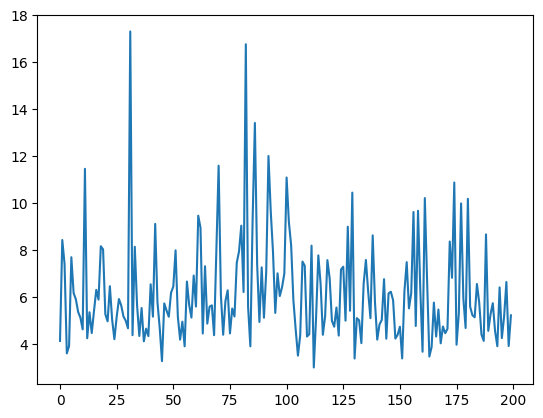

In [69]:
#33
each_mae_pca = np.array(error_pca)/6455
plt.plot(each_mae_pca)

In [70]:
print("overall MAE")
print(each_mae_pca.mean())
print("\n")
print(each_mae_pca.min())
print("\n")
print(each_mae_pca.max())

overall MAE
6.143162451078683


3.001928578666589


17.29925172497984


In [71]:
min_mae([each_mae, each_mae2, each_mae_pca])

[2,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 1]

In [72]:
#34
sel_pcad = select_model([each_mae, each_mae2, each_mae_pca], [models, models2, pcamodels])


In [73]:
#35
error_sel_pcad = VAR_errors_gen(sel_pcad, tests_itp, 0)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


overall MAE
6.142924839817871


minimum mae stock
3.001928578666589


maximum mae stock
17.29925172497984


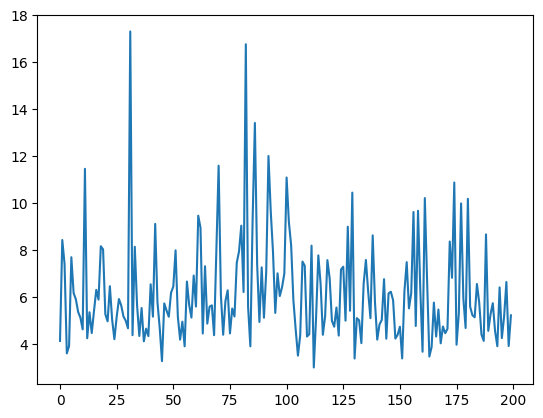

In [74]:
#36
each_mae_selpca = np.array(error_sel_pcad)/6455
plt.plot(each_mae_pca)
print("overall MAE")
print(each_mae_selpca.mean())
print("\n")
print("minimum mae stock")
print(each_mae_selpca.min())
print("\n")
print("maximum mae stock")
print(each_mae_selpca.max())

(array([40., 76., 38., 24., 11.,  6.,  2.,  1.,  0.,  2.]),
 array([ 3.00192858,  4.43166089,  5.86139321,  7.29112552,  8.72085784,
        10.15059015, 11.58032247, 13.01005478, 14.4397871 , 15.86951941,
        17.29925172]),
 <BarContainer object of 10 artists>)

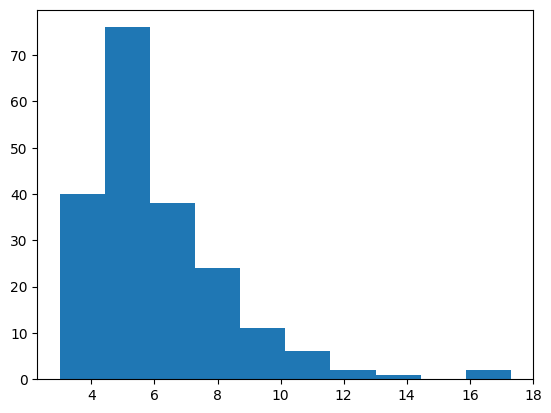

In [76]:
plt.hist(each_mae_selpca)

In [78]:
VAR_score = pd.DataFrame(each_mae_selpca)
VAR_score

0
0    4.133292
1    8.425601
2    7.411409
3    3.602074
4    3.914707
..        ...
195  4.252856
196  5.179564
197  6.638622
198  3.914707
199  5.219954

[200 rows x 1 columns]

In [83]:
VAR_score[VAR_score[0]>5]

0
1    8.425601
2    7.411409
5    7.693236
6    6.170533
7    5.900505
..        ...
191  5.736782
194  6.409469
196  5.179564
197  6.638622
199  5.219954

[135 rows x 1 columns]

In [84]:
VAR_score[VAR_score[0]>7]

0
1     8.425601
2     7.411409
5     7.693236
11   11.453243
18    8.161809
19    8.027423
31   17.299252
33    8.137151
42    9.112234
51    7.986763
61    9.460475
62    8.945484
64    7.308012
69    7.996666
70   11.587570
78    7.451500
79    7.941648
80    9.034844
82   16.754678
85    9.285564
86   13.407483
87    7.384767
89    7.261549
91    7.062099
92   11.999891
93    9.642896
94    7.906681
96    7.009398
100  11.085351
101   9.191486
102   8.201802
107   7.508945
108   7.329353
111   8.185434
114   7.771803
118   7.570364
124   7.169006
125   7.289604
127   8.992156
129  10.441522
135   7.576524
138   8.623129
153   7.482712
156   9.617842
158   9.670294
161  10.210364
172   8.362230
174  10.872901
177   9.981888
180  10.180039
188   8.664240

In [85]:
VAR_score[VAR_score[0]>9]

0
11   11.453243
31   17.299252
42    9.112234
61    9.460475
70   11.587570
80    9.034844
82   16.754678
85    9.285564
86   13.407483
92   11.999891
93    9.642896
100  11.085351
101   9.191486
129  10.441522
156   9.617842
158   9.670294
161  10.210364
174  10.872901
177   9.981888
180  10.180039

In [90]:
stid = 0
for VARmod in models2:
    print(stid)
    target = "target"
    coefficients = pd.DataFrame(VARmod.params[target])
    p_values = pd.DataFrame(VARmod.pvalues[target])

    df_VAR = pd.concat([coefficients, p_values], axis=1)
    df_VAR.columns = ['Coefficients', 'p-values']

    df_VAR_filtered = df_VAR[df_VAR['p-values'] < 0.1].dropna()
    print(df_VAR_filtered)
    stid += 1
    print("------------------------------------------------")
    print("\n")

0
                 Coefficients      p-values
L1.target        7.942721e-01  0.000000e+00
L1.matched_size -9.570728e-09  6.888454e-02
L1.wap           2.603716e+02  2.701647e-05
L1.sign_imb      3.022352e-08  4.047649e-03
L1.105           3.508571e-02  4.130353e-04
L1.160           5.667735e-02  1.444039e-07
L2.target        3.365099e-02  5.396029e-04
L2.matched_size  1.326121e-08  7.579608e-02
L2.105          -3.194775e-02  8.978045e-03
L3.105           4.858258e-02  7.255436e-05
L3.160          -4.002174e-02  2.649811e-03
L4.target        1.877806e-02  5.352692e-02
L4.wap           2.048211e+02  1.655974e-02
L4.105          -5.833290e-02  1.924234e-06
L5.wap           2.497223e+02  3.477785e-03
L5.sign_imb      2.944653e-08  4.263920e-02
L5.105           3.039599e-02  1.312830e-02
L5.160          -2.313154e-02  8.241196e-02
L6.target       -4.404797e-01  0.000000e+00
L6.matched_size -1.387116e-08  6.317101e-02
L6.wap          -1.594717e+03  1.107581e-77
L6.sign_imb     -6.302946e-08 

In [91]:
stid = 0
for VARmod in pcamodels:
    print(stid)
    target = "target"
    coefficients = pd.DataFrame(VARmod.params[target])
    p_values = pd.DataFrame(VARmod.pvalues[target])

    df_VAR = pd.concat([coefficients, p_values], axis=1)
    df_VAR.columns = ['Coefficients', 'p-values']

    df_VAR_filtered = df_VAR[df_VAR['p-values'] < 0.1].dropna()
    print(df_VAR_filtered)
    stid += 1
    print("------------------------------------------------")
    print("\n")

0
           Coefficients      p-values
const         -0.058006  2.758354e-02
L1.target      0.790730  0.000000e+00
L1.pca0        0.122995  1.957905e-02
L1.pca1        0.291099  7.873977e-19
L1.pca2       -0.099379  7.431204e-02
L1.pca3       -0.208081  3.194581e-02
L1.pca4        0.254565  1.275413e-02
L2.target      0.039397  3.276482e-05
L2.pca1       -0.184834  1.206294e-05
L2.pca4       -0.334883  1.994285e-02
L2.pca5        0.114259  1.671073e-02
L4.target      0.016059  9.054648e-02
L4.pca0        0.198637  6.475867e-03
L4.pca1       -0.180329  1.962030e-05
L4.pca2        0.164168  2.537916e-02
L4.pca5       -0.139763  3.565630e-03
L5.target     -0.020422  3.137259e-02
L5.pca4        0.291231  4.301572e-02
L5.pca5       -0.092785  5.305575e-02
L6.target     -0.419482  0.000000e+00
L6.pca0       -1.118085  3.930576e-53
L6.pca1        0.244269  7.299778e-09
L6.pca2       -0.142172  5.256203e-02
L6.pca3        0.725850  6.187730e-08
L7.target      0.341516  0.000000e+00
L7.pca0   

In [92]:
stid = 0
for VARmod in sel_pcad:
    print(stid)
    target = "target"
    coefficients = pd.DataFrame(VARmod.params[target])
    p_values = pd.DataFrame(VARmod.pvalues[target])

    df_VAR = pd.concat([coefficients, p_values], axis=1)
    df_VAR.columns = ['Coefficients', 'p-values']

    df_VAR_filtered = df_VAR[df_VAR['p-values'] < 0.1].dropna()
    print(df_VAR_filtered)
    stid += 1
    print("------------------------------------------------")
    print("\n")

0
           Coefficients      p-values
const         -0.058006  2.758354e-02
L1.target      0.790730  0.000000e+00
L1.pca0        0.122995  1.957905e-02
L1.pca1        0.291099  7.873977e-19
L1.pca2       -0.099379  7.431204e-02
L1.pca3       -0.208081  3.194581e-02
L1.pca4        0.254565  1.275413e-02
L2.target      0.039397  3.276482e-05
L2.pca1       -0.184834  1.206294e-05
L2.pca4       -0.334883  1.994285e-02
L2.pca5        0.114259  1.671073e-02
L4.target      0.016059  9.054648e-02
L4.pca0        0.198637  6.475867e-03
L4.pca1       -0.180329  1.962030e-05
L4.pca2        0.164168  2.537916e-02
L4.pca5       -0.139763  3.565630e-03
L5.target     -0.020422  3.137259e-02
L5.pca4        0.291231  4.301572e-02
L5.pca5       -0.092785  5.305575e-02
L6.target     -0.419482  0.000000e+00
L6.pca0       -1.118085  3.930576e-53
L6.pca1        0.244269  7.299778e-09
L6.pca2       -0.142172  5.256203e-02
L6.pca3        0.725850  6.187730e-08
L7.target      0.341516  0.000000e+00
L7.pca0   

In [ ]:
#try ridge, lasso, elastic net

In [ ]:
#try regime switch model

In [ ]:
#try random forest

In [ ]:
# try LSTM

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD

In [56]:
def create_LSTM_model(neurons=32, learn_rate=0.01, momentum=0):
    # Create the model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train.shape[0], X_train.shape[1])))
    model.add(Dense(1))

    # Use the optimizer you defined
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer=optimizer)

    return model

In [58]:
Y_train = pca_dfs[0]["target"].head(20000)
Y_train

0       -3.029704
1        0.389814
2        4.220009
3        5.450249
4        3.169775
           ...   
19995   -1.800060
19996   -8.959770
19997   -4.439950
19998   -2.959967
19999    1.720190
Name: target, Length: 20000, dtype: float64

In [62]:
ex_cols = [x for x in pca_dfs[0].columns if x!="target"]
X_train = pca_dfs[0][ex_cols].head(20000)
X_train

pca0      pca1      pca2      pca3      pca4
0      0.149638 -0.514949 -0.386785 -0.368039  0.636313
1      0.133563  0.262897 -0.564521 -0.141846  0.295049
2     -0.008470  1.802661 -0.765103 -0.160160  0.173382
3      0.224396  2.201674  0.047405 -0.075355  0.554060
4      0.548127  2.355485 -0.492392 -0.123033  0.244496
...         ...       ...       ...       ...       ...
19995  0.797797  0.336339 -0.272721 -0.246416  0.061724
19996  1.174200 -2.321993 -0.176512 -0.238899  0.188388
19997  1.377804 -1.398840  0.116122 -0.160107  0.254947
19998  1.037738 -0.969048 -0.632651 -0.246730 -0.107162
19999  0.543703 -1.027560 -0.544441 -0.238226 -0.063477

[20000 rows x 5 columns]

In [61]:
ex_cols = [x for x in pca_dfs[0].columns if x!="target"]
ex_cols

['pca0', 'pca1', 'pca2', 'pca3', 'pca4']